# Azure Resource Usage Data Analysis
This notebook analyzes and visualizes Azure resource usage patterns across different regions and resource types. The analysis includes CPU usage, storage patterns, user activity, and their correlations.

## 1. Data Loading and Initial Exploration
Loading the merged dataset containing Azure usage metrics and performing initial data exploration.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
merged = pd.read_csv("../Data/Processed/cleaned_merged.csv")
print("Initial rows of the dataset:")
print(merged.head())

Initial rows of the dataset:
         date   region resource_type  usage_cpu  usage_storage  users_active  \
0  2023-01-01  east us            vm         88           1959           470   
1  2023-01-01  east us       storage         92           1595           388   
2  2023-01-01  east us     container         70            621           414   
3  2023-01-01  west us            vm         60           1982           287   
4  2023-01-01  west us       storage         85           1371           351   

   economic_index  cloud_market_demand  holiday  
0          104.97                 0.99        1  
1          104.97                 0.99        1  
2          104.97                 0.99        1  
3          104.97                 0.99        1  
4          104.97                 0.99        1  


### Data Overview
Let's look at the unique regions and resource types in our dataset.

In [3]:
print("Unique Regions:")
print(merged.region.unique())
print("\nResource Types:")
print(merged.resource_type.unique())

Unique Regions:
['east us' 'west us' 'north europe' 'southeast asia']

Resource Types:
['vm' 'storage' 'container']


## 2. Resource Usage Analysis
### 2.1 CPU Usage Patterns
Analyzing CPU usage trends across different resource types over time.

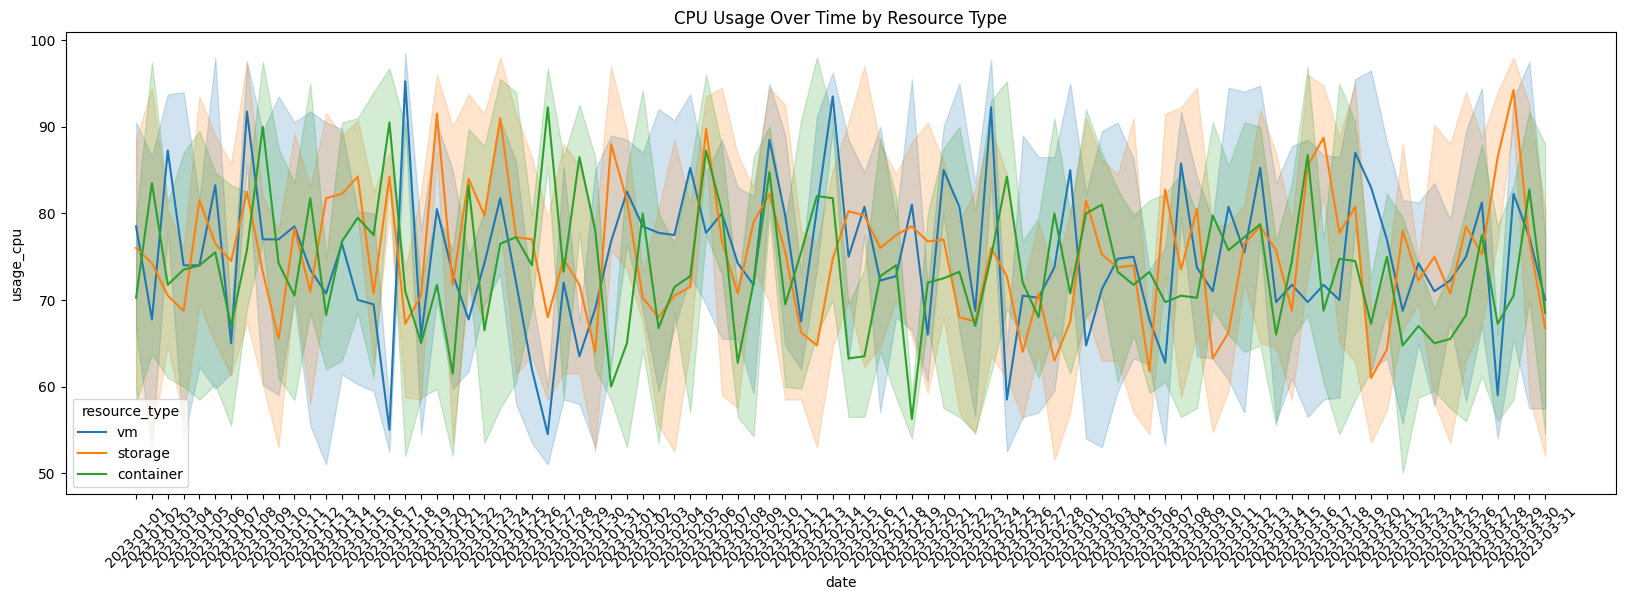

In [4]:
plt.figure(figsize=(20,6))
sns.lineplot(data=merged, x="date", y="usage_cpu", hue="resource_type")
plt.title("CPU Usage Over Time by Resource Type")
plt.xticks(rotation=45)
plt.show()

### 2.2 Regional Usage Analysis
Examining usage patterns across different regions.

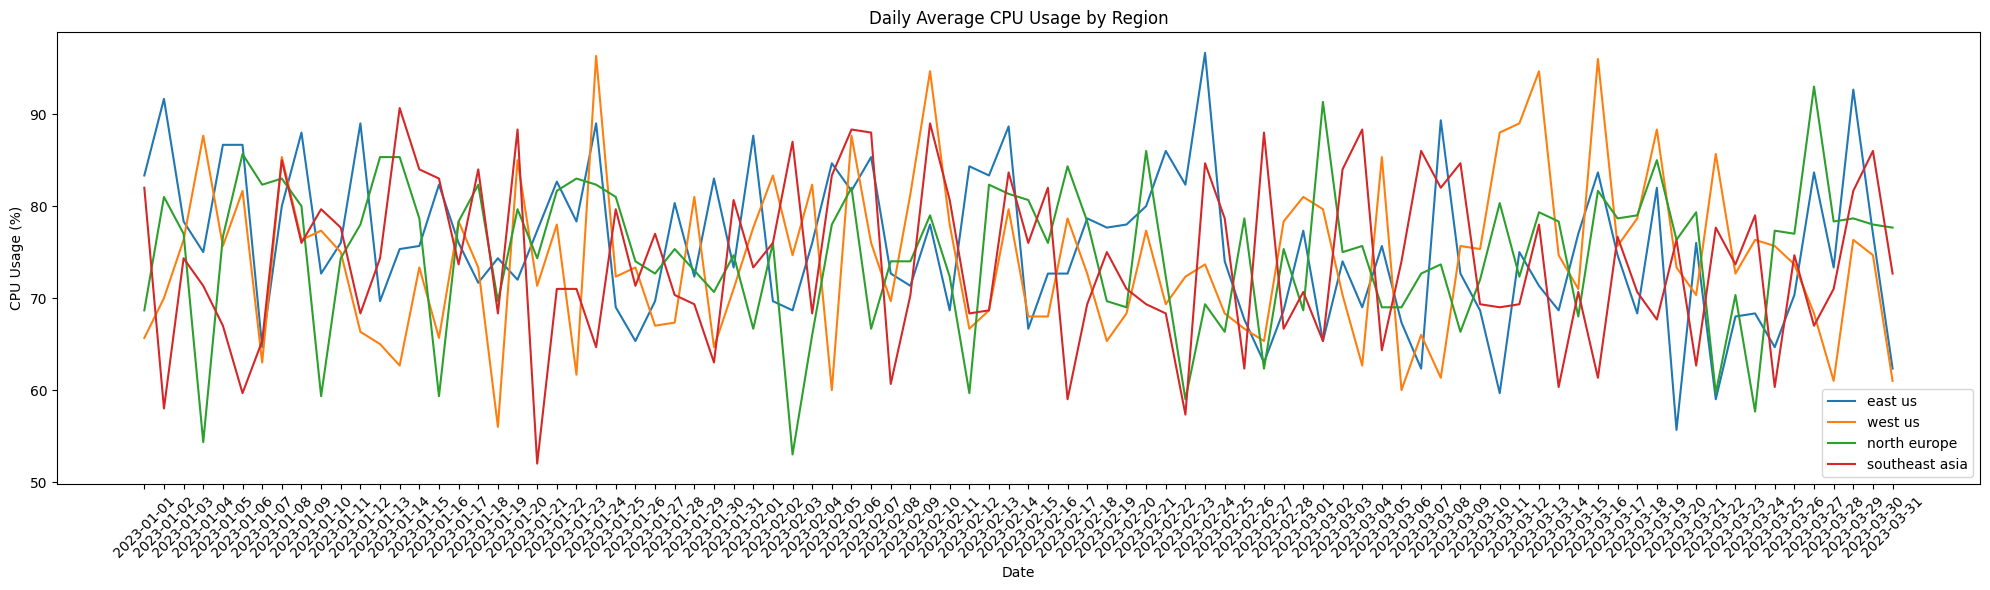

In [5]:
plt.figure(figsize=(20, 6))
for region in merged['region'].unique():
    region_data = merged[merged['region'] == region]
    daily_avg = region_data.groupby('date')['usage_cpu'].mean()
    plt.plot(daily_avg.index, daily_avg.values, label=region)

plt.title('Daily Average CPU Usage by Region')
plt.xlabel('Date')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. User Activity Analysis
Analyzing user activity patterns across different regions.

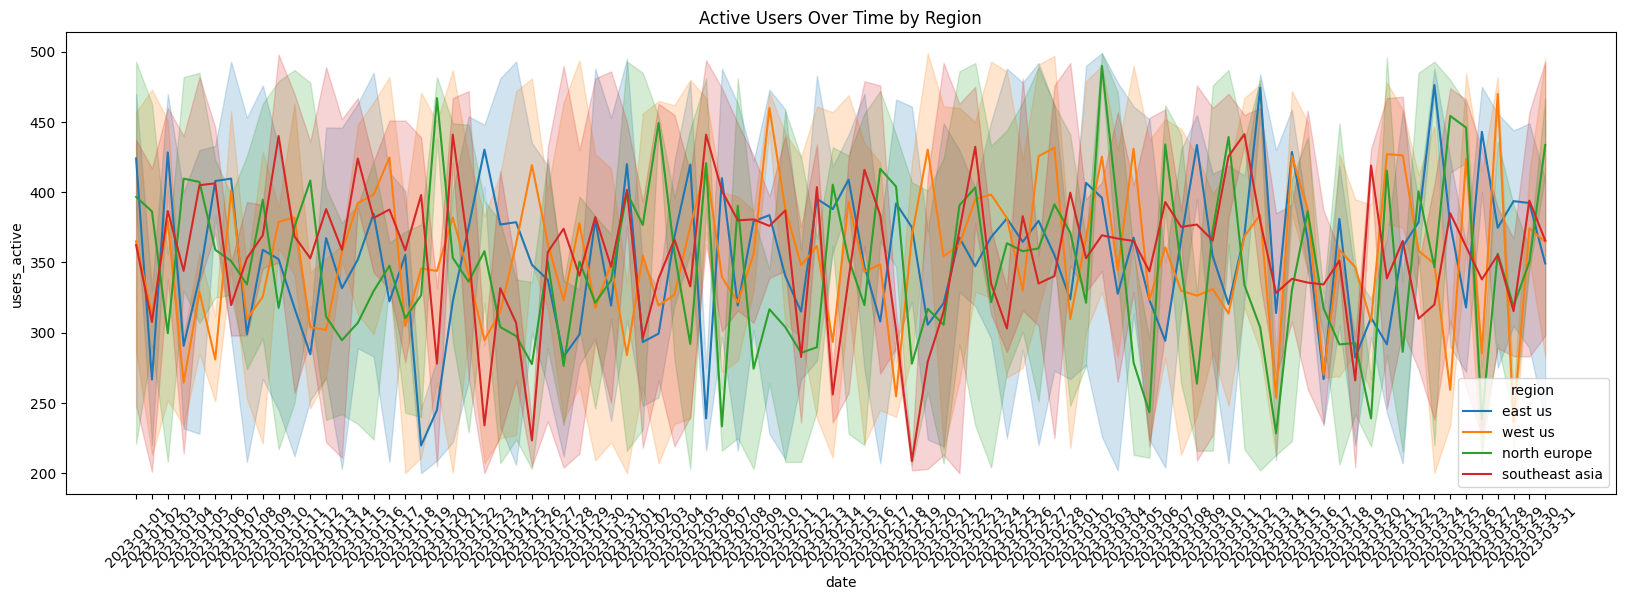

In [6]:
plt.figure(figsize=(20,6))
sns.lineplot(data=merged, x="date", y="users_active", hue="region")
plt.title("Active Users Over Time by Region")
plt.xticks(rotation=45)
plt.show()

## 4. Storage Usage Analysis
Examining storage usage patterns and distribution across regions and resource types.

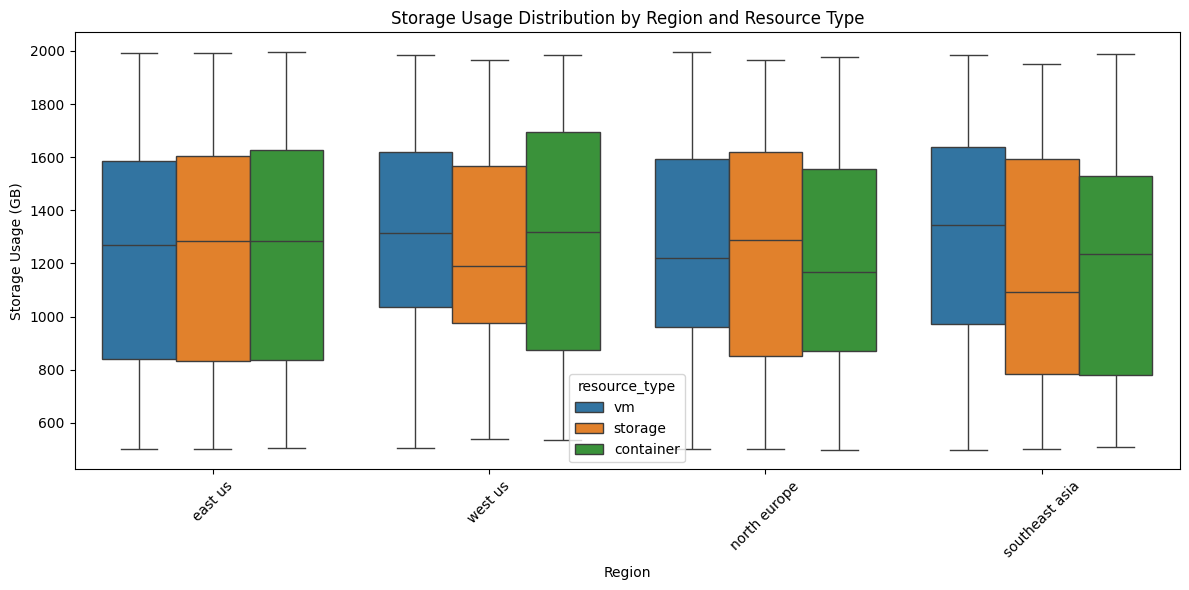


Average Storage Usage by Region:
                   mean     std
region                         
east us         1243.45  456.13
north europe    1228.45  427.90
southeast asia  1220.16  440.40
west us         1277.84  403.80


In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged, x='region', y='usage_storage', hue='resource_type')
plt.title('Storage Usage Distribution by Region and Resource Type')
plt.xlabel('Region')
plt.ylabel('Storage Usage (GB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nAverage Storage Usage by Region:")
print(merged.groupby('region')['usage_storage'].agg(['mean', 'std']).round(2))

## 5. Resource Distribution Analysis
Analyzing the distribution of resources and their usage patterns across regions.

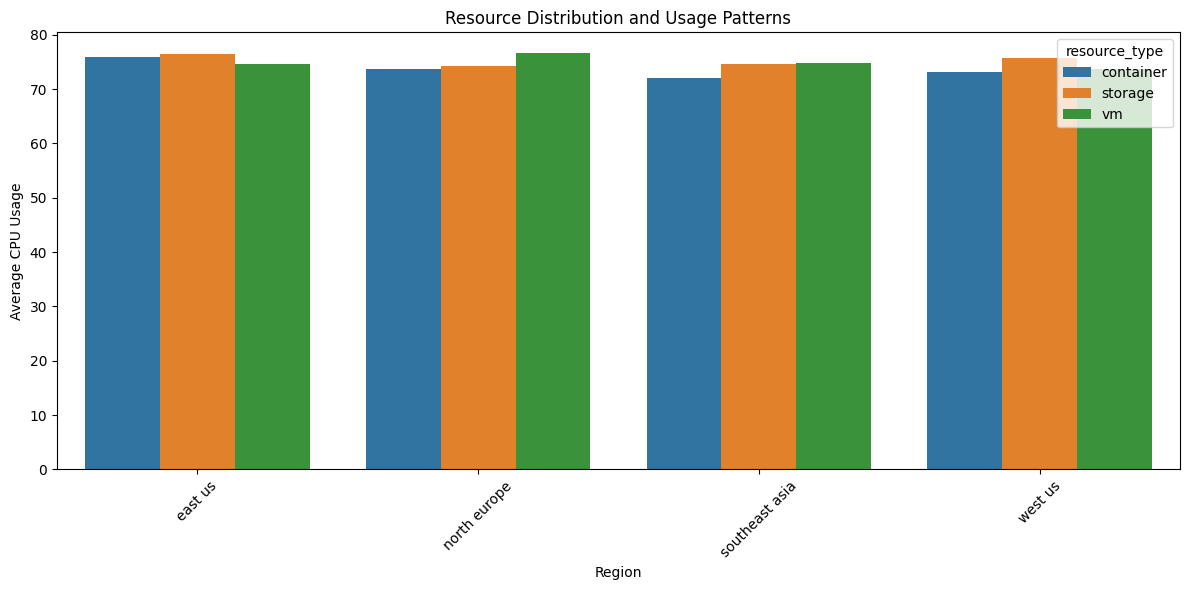

In [8]:
plt.figure(figsize=(12, 6))
resource_metrics = merged.groupby(['region', 'resource_type']).agg({
    'usage_cpu': 'mean',
    'usage_storage': 'mean',
    'users_active': 'mean'
}).reset_index()

sns.barplot(data=resource_metrics, x='region', y='usage_cpu', hue='resource_type')
plt.title('Resource Distribution and Usage Patterns')
plt.xlabel('Region')
plt.ylabel('Average CPU Usage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6. Economic and Market Analysis
Analyzing the relationship between economic indicators and cloud market demand.

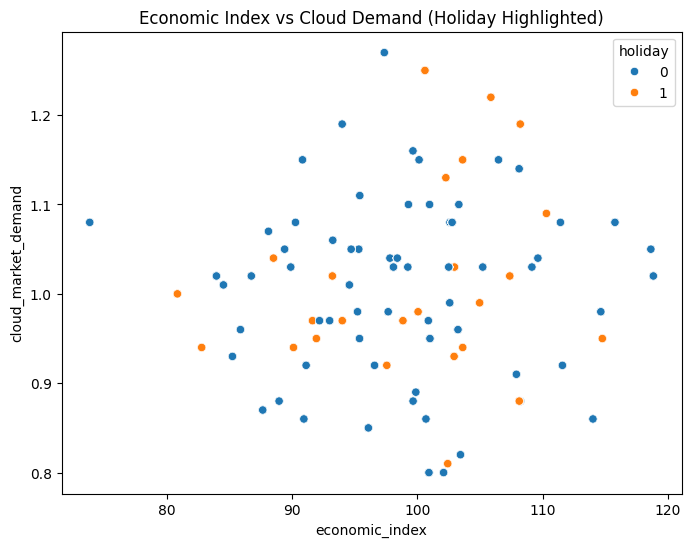

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="economic_index", y="cloud_market_demand", hue="holiday")
plt.title("Economic Index vs Cloud Demand (Holiday Highlighted)")
plt.show()

## 7. Correlation Analysis
Examining relationships between different usage metrics.

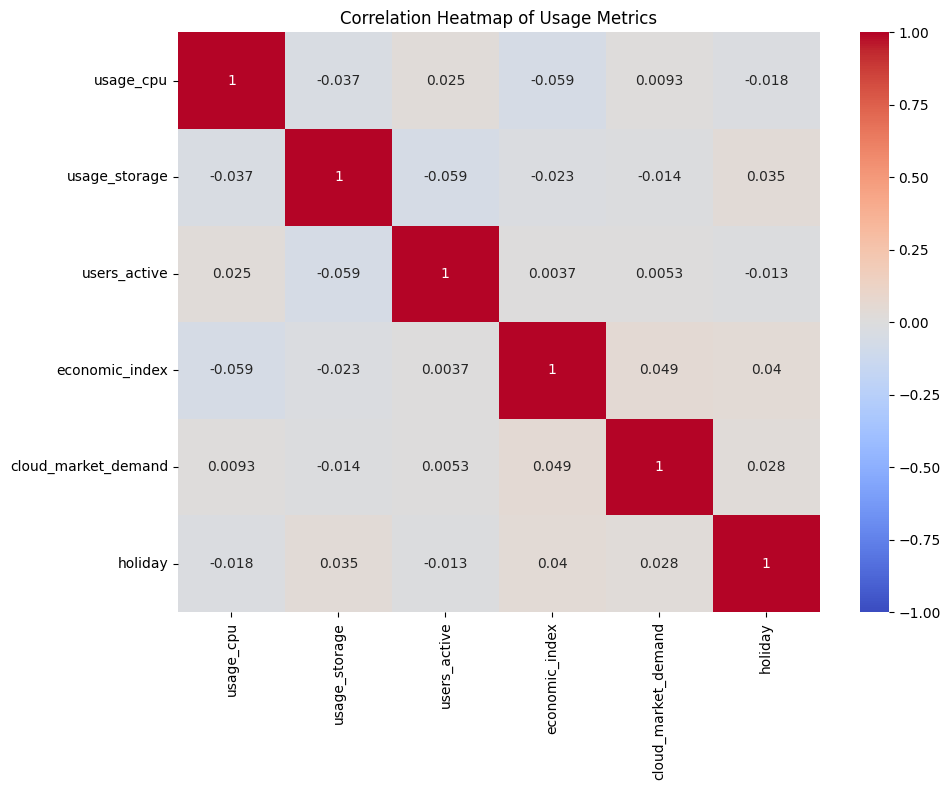

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = merged[['usage_cpu', 'usage_storage', 'users_active', 'economic_index', 'cloud_market_demand', 'holiday']].corr()
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0)
plt.title('Correlation Heatmap of Usage Metrics')
plt.tight_layout()
plt.show()